In [2]:
library("DiceKriging")

In [3]:
# Get data import sorted out
library(readr)
beer=read_csv("../data/data.csv")
# Remove erronious SG measurements
beer.normGrav = beer[beer$OG < 3,]
# Take a subsample; running kriging on the full dataset takes >16GB of RAM
beer.normGrav.subsample = beer.normGrav[sample(1:nrow(beer.normGrav), 1000),]

# Random seed for reproducibility
set.seed(1234)



Parsed with column specification:
cols(
  ID = col_integer(),
  Size = col_double(),
  OG = col_double(),
  FG = col_double(),
  IBU = col_double(),
  Color = col_double(),
  BoilSize = col_double(),
  BoilTime = col_integer(),
  BoilGravity = col_double(),
  Efficiency = col_double(),
  MashThickness = col_double(),
  ABV = col_double()
)


In [4]:
model = km(ABV~.,
           design = beer.normGrav.subsample[,1:11],
           response = beer.normGrav.subsample[,12],
           covtype="gauss",
           coef.var = var(beer.normGrav.subsample),
          )


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~ID + Size + OG + FG + IBU + Color + BoilSize + BoilTime + BoilGravity + 
    Efficiency + MashThickness
* covariance model : 
  - type :  gauss 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  348 3516.44 0.302 0.076 630.66 100 3994 480 0.264 148 60 
  - best initial criterion value(s) :  -1024.272 

N = 11, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       1024.3  |proj g|=       3.4597
At iterate     1  f =      -760.01  |proj g|=        5.3826
At iterate     2  f =      -936.09  |proj g|=         1.385
At iterate     3  f =        -1060  |proj g|=      0.047282
At iterate     4  f =      -1060.6  |proj g|=      0.036734
At iterate     5  f =        -1061  |proj g|=      0.024936
At itera

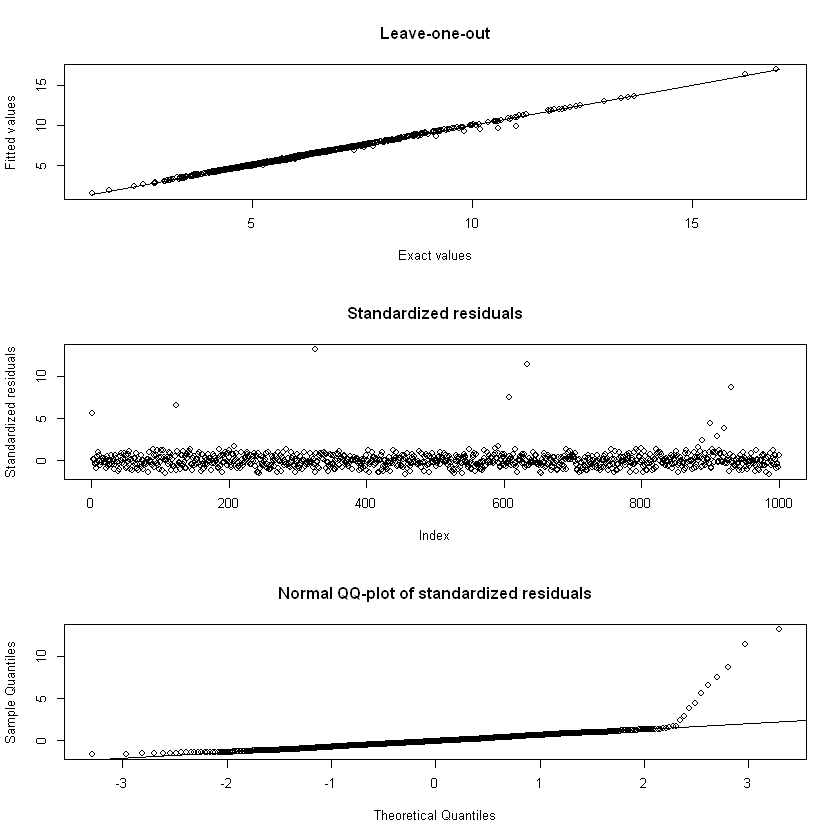

In [5]:
plot(model)

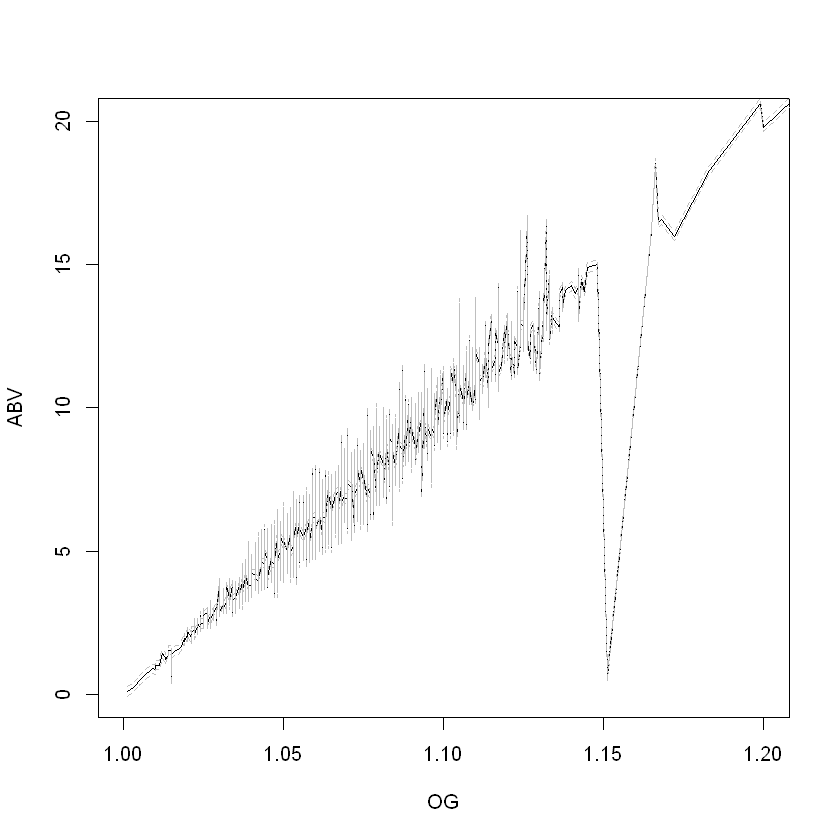

In [6]:
testSet = beer.normGrav[sample(1:nrow(beer.normGrav), 10000),]
testSet = testSet[order(testSet$OG),]
prediction = predict.km(model,
                        newdata = testSet[,1:11],
                        type = "SK" # Simple Kriging
                        )
plot(testSet[,1:11]$OG,
     prediction$mean,
     type = "l",
     xlim = c(1,1.2),
     ylim = c(0,20),
     xlab = "OG",
     ylab = "ABV")
lines(testSet[,1:11]$OG,
      prediction$lower95,
      col="grey",
      lty = 2)
lines(testSet[,1:11]$OG,
      prediction$upper95,
      col="grey",
      lty = 2)

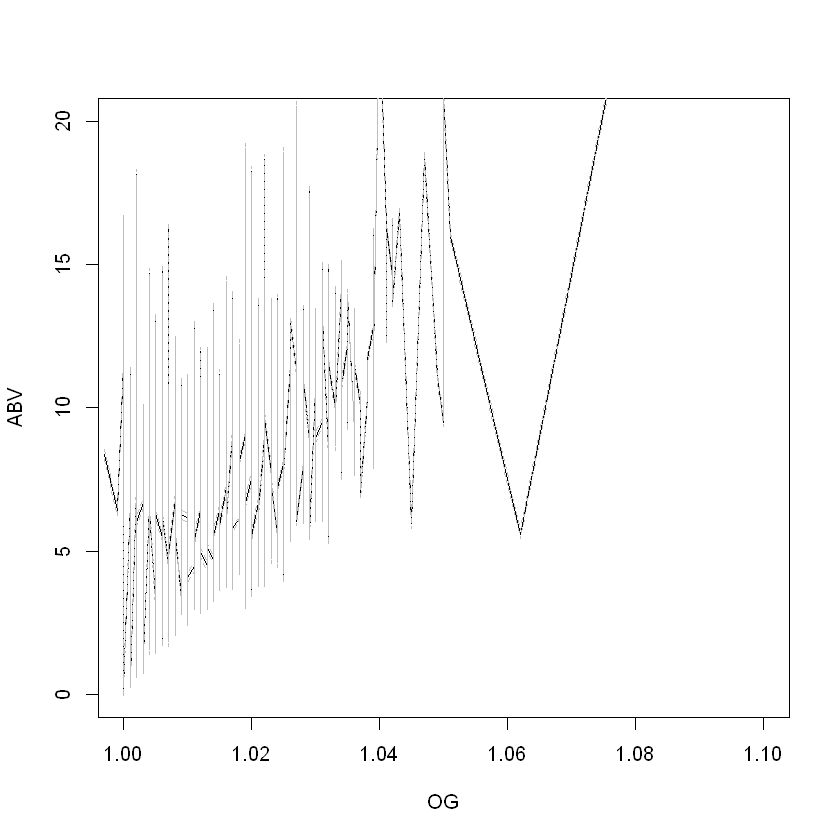

In [7]:
testSet = beer.normGrav[sample(1:nrow(beer.normGrav), 10000),]
testSet = testSet[order(testSet$FG),]
prediction = predict.km(model,
                        newdata = testSet[,1:11],
                        type = "SK" # Simple Kriging
                        )
plot(testSet[,1:11]$FG,
     prediction$mean,
     type = "l",
     xlim = c(1,1.1),
     ylim = c(0,20),
     xlab = "OG",
     ylab = "ABV")
lines(testSet[,1:11]$FG,
      prediction$lower95,
      col="grey",
      lty = 2)
lines(testSet[,1:11]$FG,
      prediction$upper95,
      col="grey",
      lty = 2)
